import pandas and dataset and select attributes in question

SEX_A : sex, LSATIS11R_A: happiness 11, LSATIS4R_A: happiness 4, WEIGHTLBTC_A: weight, DEPFREQ_A: depression freq, ANXFREQ_A: anxiety freq

SAD_A: can't feel happy freq, PAIFRQ3M_A: pain freq, REPSTRAIN_A: repetitive injury, PHSTAT_A: health status, HHX: house id number

In [2]:
import pandas as pd
data = pd.read_csv('adult21.csv')
att = ['SEX_A','LSATIS11R_A','LSATIS4R_A','WEIGHTLBTC_A','DEPFREQ_A','ANXFREQ_A','SAD_A','PAIFRQ3M_A','REPSTRAIN_A','PHSTAT_A','HHX']
data_pp = data[att]

# Remove columns where 'SEX_A' isn't a 1 or 2
data_drop = data[(data['SEX_A'] == 7) | (data['SEX_A'] == 9)].index
data_pp = data_pp.drop(data_drop, inplace = False)

Playing w Data: How sex relates to mental illness

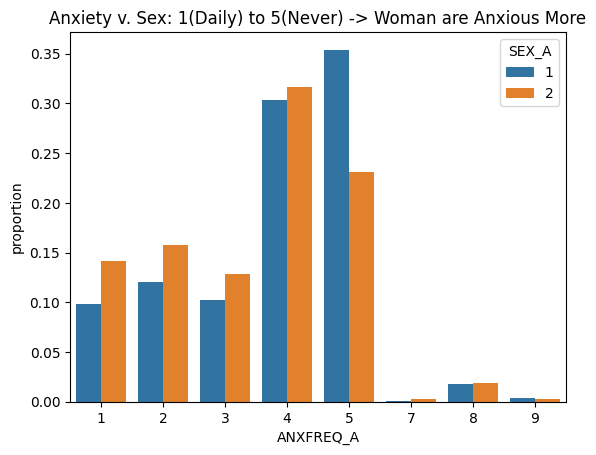

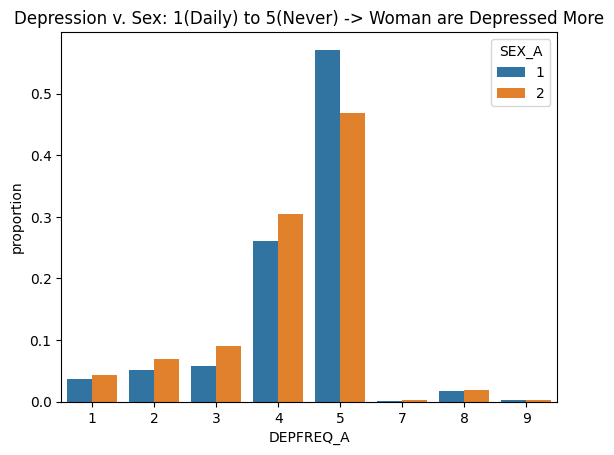

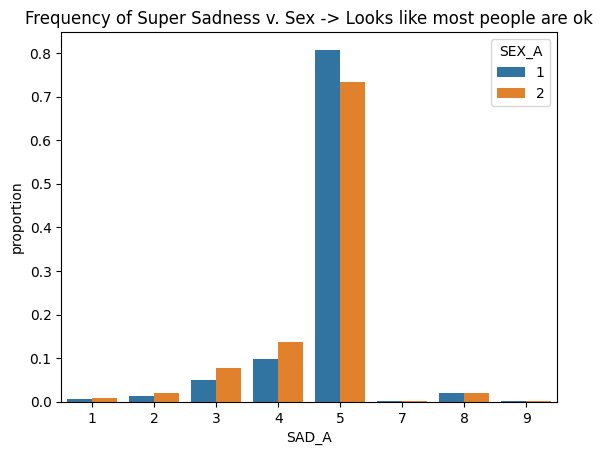

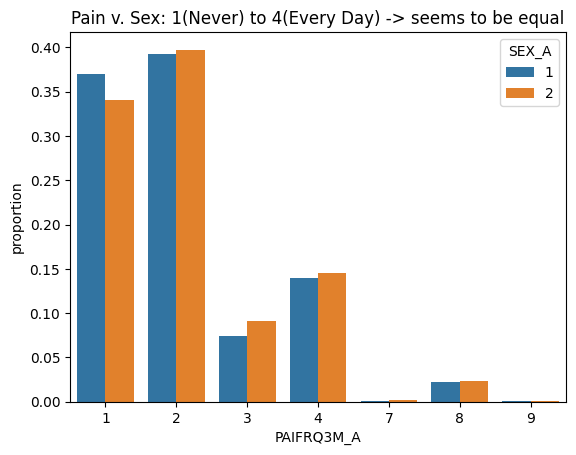

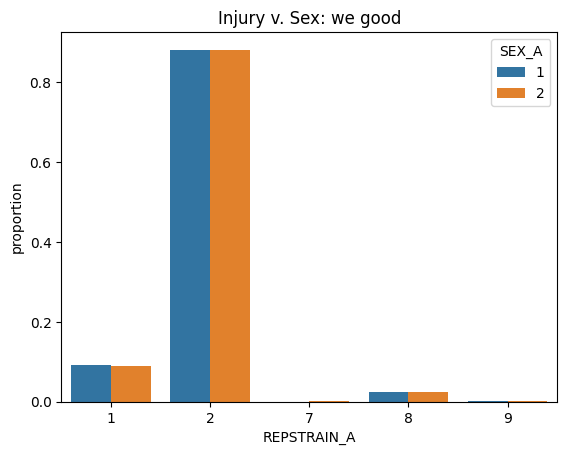

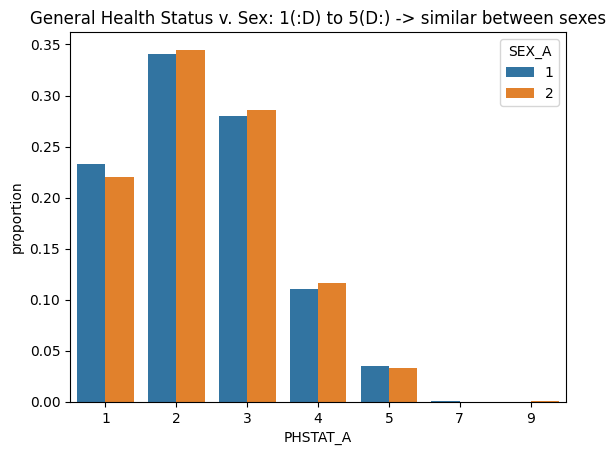

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 



anx_sex = data_pp.groupby(['SEX_A'], as_index = False)['ANXFREQ_A'].value_counts(ascending = False, normalize = True)
dep_sex = data_pp.groupby(['SEX_A'], as_index = False)['DEPFREQ_A'].value_counts(ascending = False, normalize = True)
sad_sex = data_pp.groupby(['SEX_A'], as_index = False)['SAD_A'].value_counts(ascending = False, normalize = True)
pain_sex = data_pp.groupby(['SEX_A'], as_index = False)['PAIFRQ3M_A'].value_counts(ascending = False, normalize = True)
injury_sex = data_pp.groupby(['SEX_A'], as_index = False)['REPSTRAIN_A'].value_counts(ascending = False, normalize = True)
health_sex = data_pp.groupby(['SEX_A'], as_index = False)['PHSTAT_A'].value_counts(ascending = False, normalize = True)


sns.barplot(data = anx_sex, x = 'ANXFREQ_A', y = 'proportion', hue = "SEX_A").set(title = "Anxiety v. Sex: 1(Daily) to 5(Never) -> Woman are Anxious More")
plt.show()
sns.barplot(data = dep_sex, x = 'DEPFREQ_A', y = 'proportion', hue = "SEX_A").set(title = "Depression v. Sex: 1(Daily) to 5(Never) -> Woman are Depressed More") 
plt.show()
sns.barplot(data = sad_sex, x = 'SAD_A', y = 'proportion', hue = "SEX_A").set(title = "Frequency of Super Sadness v. Sex -> Looks like most people are ok")
plt.show()
sns.barplot(data = pain_sex, x = 'PAIFRQ3M_A', y = 'proportion', hue = "SEX_A").set(title = "Pain v. Sex: 1(Never) to 4(Every Day) -> seems to be equal")
plt.show()
sns.barplot(data = injury_sex, x = 'REPSTRAIN_A', y = 'proportion', hue = "SEX_A").set(title = "Injury v. Sex: we good")
plt.show()
sns.barplot(data = health_sex, x = 'PHSTAT_A', y = 'proportion', hue = "SEX_A").set(title = "General Health Status v. Sex: 1(:D) to 5(D:) -> similar between sexes")
plt.show()



Rows where data is nan

In [30]:
data_isna = data.isnull().sum() * 100 / len(data)
display(data_isna[data_isna <= 0].value_counts())

row_na = []

for i in range(0,len(data)):
    h = 1 - (data.loc[i].isna().sum())/622
    row_na.append(h)


0.0    187
dtype: int64

NameError: name 'sns' is not defined

[Text(0.5, 0, 'percentage of columns not na, no preprocessing'),
 Text(0.5, 1.0, 'banana')]

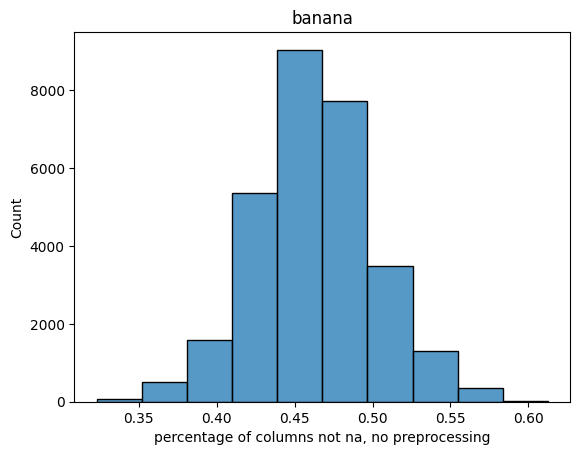

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
row_na = pd.Series(row_na)
sns.histplot(data = row_na, x = row_na.values, bins=10).set(xlabel = 'percentage of columns not na, no preprocessing', title = "banana")


In [48]:
data_30 = data_isna[data_isna < 70]

data_prepro = data[data_30.index]

row_na_prepro = []

for i in range(0,len(data_prepro)):
    h = 1 - (data_prepro.loc[i].isna().sum())/324
    row_na_prepro.append(h)
    

0.8252857361805194

0.4614147909967846

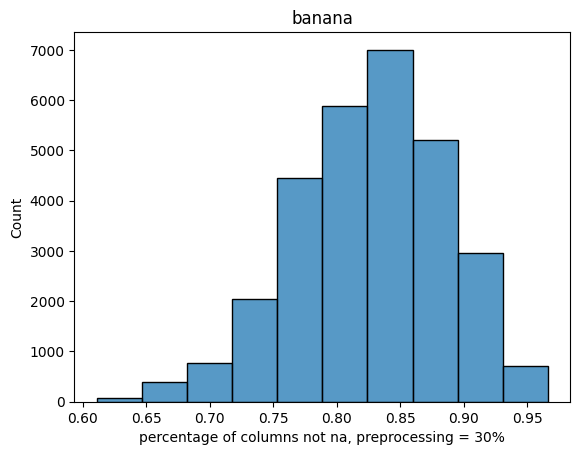

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
row_na_prepro = pd.Series(row_na_prepro)
sns.histplot(data = row_na_prepro, x = row_na_prepro.values, bins=10).set(xlabel = 'percentage of columns not na, preprocessing = 30%', title = "banana")
display(row_na_prepro.mean())
display(row_na.median())